# Разведочный анализ данных: Data Visualization. Практическая работа

Сдаётся на проверку.

## Цели практической работы
1. Познакомиться с библиотекой matplotlib.
2. Потренирироваться выявлять аномалии в данных при помощи визуализации и обрабатывать их.
3. Потренироваться строить графики для количественных переменных.
4. Потренироваться строить графики для категориальных переменных.
5. Потренироваться выявлять зависимости в данных при помощи визуализации и формул.
6. Подготовить датафрейм к этапу генерации признаков.

## Что входит в практическую работу
1. Загрузить датасет и ознакомиться с ним.
2. Исследовать данные на аномальные значения и скорректировать выбросы.
3. Построить графика для количественных переменных.
4. Построить графика для категориальных переменных.
5. Исследовать зависимости в данных. 

## Что оценивается
- Программа выдаёт верный ответ на заданном наборе данных.
- Описаны причины выбранного решения, если требуется.
- Код читабелен: переменным даны осмысленные названия, отступы и правила расстановки пробелов соблюдены.
- При построении графиков название и оси подписаны, выведена легенда, если требуется. 
- Репозиторий проекта содержит осмысленные коммиты, содержащие конкретные реализованные фичи, ветки названы согласно назначению, лишние файлы не хранятся в репозитории.
- В репозитории проекта соблюдена иерархия директорий согласно списку модулей и содержащихся в них тем.
- Репозиторий проекта содержит файлы с данными, полученными в результате выполнения практической работы.


## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему проверяющему куратору.


## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы продолжите знакомиться с визуализацией данных и выявлением аномалий при помощи `matplotlib`, а также выявлением зависимостей в данных.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Задача 1. Выявление аномалий в стоимости автомобиля

1. Загрузите датасет из `data/vehicles_dataset_upd.csv` и выведите первые 5 записей.


In [2]:
# Загружаем данные
df = pd.read_csv('data/vehicles_dataset_upd.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. Постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, цвет — `indigo`.
Не забудьте подписать название графика и оси.

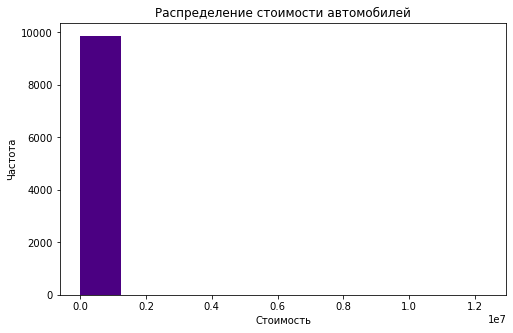

In [3]:
# Строим гистограмму
fig = plt.subplots(figsize=(8, 5))

plt.hist(df.price, color='indigo')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобилей');

3. График гистограммы в таком виде не дает представления о реальном распределении, но из него можно сделать вывод о наличии выбросов.
Постройте «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости.
Не забудьте подписать название графика и оси.

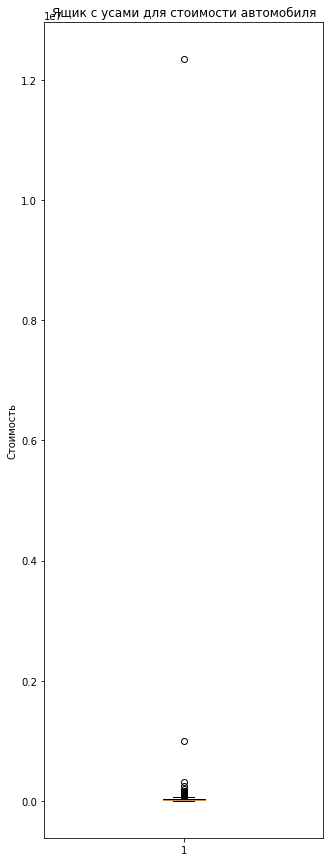

In [4]:
# Строим ящик с усами определения наличия выбросов
plt.figure(figsize=(5, 15))
plt.boxplot(df.price)
plt.ylabel('Стоимость')
plt.title('Ящик с усами для стоимости автомобиля');

4. Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна.
Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью `apply(lambda x: f"{x:0.3f}")` отобразите значения в удобном для восприятия виде.

In [5]:
# Описательная статистика стоимости автомобиля
df.price.describe()

count    9.868000e+03
mean     2.060201e+04
std      1.254372e+05
min      5.000000e+02
25%      7.800000e+03
50%      1.559000e+04
75%      2.799000e+04
max      1.234568e+07
Name: price, dtype: float64

In [6]:
# Описательная статистика стоимости автомобиля
df.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

5. Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах. Посмотрите, входят ли минимальное и максимальное значения в интервал между полученными границами.

In [7]:
#Создадим функцию для подсчета интерквартильного размаха
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries_ = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries_


#Выведем границы с помощью нашей функции.
boundaries = calculate_outliers(df.price)
boundaries

(-22485.0, 58275.0)

6. Посчитайте и выведете количество выбросов в стоимости автомобиля. 

In [8]:
#Количество выбросов в стоимости автомобиля
is_outlier = (df.price < int(boundaries[0])) | (df.price > int(boundaries[1]))
is_outlier.sum()

207

7. Выведете записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости. Посмотрите на данные и подумайте, могут ли данные выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.

In [9]:
#Записи, в которых стоимость автомобиля попадает в выбросы
df[is_outlier].sort_values('price')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
934,7312212565,https://lasvegas.craigslist.org/cto/d/fresno-d...,las vegas,https://lasvegas.craigslist.org,58500,2013,ram,3500 limited,diesel,57149,clean,automatic,https://images.craigslist.org/00o0o_6VEbwgYoL0...,Only 57K Miles! This 3500 RAM Truck has the 6....,nv,36.746400,-119.639700,2021-04-24T20:46:06-0700,high,2021-04-25 03:46:06+00:00
5977,7310551940,https://cincinnati.craigslist.org/ctd/d/camp-d...,cincinnati,https://cincinnati.craigslist.org,58500,2019,chevrolet,"silverado 2500hd 4wd crew cab 153.7"" ltz",other,50930,clean,automatic,https://images.craigslist.org/01010_ldls5xr3zz...,***Call Us for more information at: 513-453-41...,oh,39.171991,-84.271999,2021-04-21T17:05:31-0400,high,2021-04-21 21:05:31+00:00
4783,7308933629,https://omaha.craigslist.org/cto/d/cortland-20...,omaha / council bluffs,https://omaha.craigslist.org,58500,2008,chevrolet,corvette,gas,11000,clean,manual,https://images.craigslist.org/00P0P_kxzGxZwBY9...,2008 Corvette Z06 Wil Cooksey Edition Car nu...,ia,40.445488,-96.713695,2021-04-18T15:53:04-0500,high,2021-04-18 20:53:04+00:00
8050,7307146509,https://lubbock.craigslist.org/ctd/d/brownfiel...,lubbock,https://lubbock.craigslist.org,58600,2019,ford,f-150,gas,29458,clean,automatic,https://images.craigslist.org/00E0E_6JF7CBAVf7...,Stanley CDJR Brownfield address: 1706 Lubbo...,tx,33.196047,-102.273565,2021-04-15T08:58:48-0500,high,2021-04-15 13:58:48+00:00
1253,7313450196,https://lasvegas.craigslist.org/ctd/d/salem-20...,las vegas,https://lasvegas.craigslist.org,58670,2016,chevrolet,other,other,16407,clean,automatic,https://images.craigslist.org/00000_e7iiMwUVq3...,2016 *** Chevrolet Corvette 2LZ Z06*** ...,nv,44.927304,-123.030322,2021-04-27T11:29:39-0700,high,2021-04-27 18:29:39+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015,other,Lamborghini Huracan,gas,33875,clean,other,https://images.craigslist.org/01717_55Ai9omMq5...,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.466088,-81.396429,2021-05-01T11:48:44-0400,high,2021-05-01 15:48:44+00:00
290,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017,ferrari,488 gtb,gas,6012,clean,automatic,https://images.craigslist.org/00t0t_dN5Wr8nfOx...,2017 Ferrari 488 GTB Coupe2017 Ferrari 488 GTB...,az,32.236075,-110.878886,2021-04-22T09:38:59-0700,high,2021-04-22 16:38:59+00:00
5585,7313998757,https://winchester.craigslist.org/ctd/d/manass...,winchester,https://winchester.craigslist.org,304995,2021,porsche,911,gas,22,clean,automatic,https://images.craigslist.org/00r0r_gh2TnrNdSu...,2021 PORSCHE 911 Turbo Offered by: Insider...,va,38.762669,-77.461754,2021-04-28T15:49:25-0400,high,2021-04-28 19:49:25+00:00
9663,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022,other,Any make any model,other,283995,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00


8. Выведете последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [10]:
# последние 15 записей в отсортированном ранее датафрейме с выбросами
df[is_outlier].sort_values('price').tail(15)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
4073,7311841843,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,120000,2021,chevrolet,corvette c8 z51,gas,10,clean,automatic,https://images.craigslist.org/00z0z_99zXyVvNmm...,New arrival Z51 Call or text annamarie for d...,nm,35.081800,-106.648200,2021-04-24T08:38:45-0600,high,2021-04-24 14:38:45+00:00
1674,7303398175,https://pullman.craigslist.org/cto/d/pullman-6...,pullman / moscow,https://pullman.craigslist.org,123456,1995,other,cadvwrambuick,gas,283995,missing,other,https://images.craigslist.org/00i0i_5iBwIawLgG...,I have several cars to get rid of: A '65 Ramb...,id,46.735200,-117.172900,2021-04-07T15:57:23-0700,high,2021-04-07 22:57:23+00:00
9072,7308732637,https://evansville.craigslist.org/ctd/d/evansv...,evansville,https://evansville.craigslist.org,123456,2006,jeep,wrangler,gas,12345,clean,other,https://images.craigslist.org/00I0I_2IkqjY69Zq...,Very Nice TJ jeeps and a few LJ jeep wranglers...,in,38.025845,-87.596457,2021-04-18T09:55:42-0500,high,2021-04-18 14:55:42+00:00
2963,7308463617,https://jacksonville.craigslist.org/cto/d/pont...,jacksonville,https://jacksonville.craigslist.org,129000,2018,mercedes-benz,benz amg gt c,gas,4000,clean,automatic,https://images.craigslist.org/00C0C_bN8j4IcEqW...,Beautiful car in perfect condition. Very rare ...,fl,30.122300,-81.362700,2021-04-17T16:48:42-0400,high,2021-04-17 20:48:42+00:00
5076,7314445453,https://boston.craigslist.org/gbs/ctd/d/methue...,boston,https://boston.craigslist.org,129995,2007,ferrari,f430 spider,gas,12351,clean,manual,https://images.craigslist.org/00q0q_3DqREXHC0j...,2007 Ferrari F430 Spider 2dr Convertible O...,ma,42.756205,-71.210258,2021-04-29T14:45:08-0400,high,2021-04-29 18:45:08+00:00
6471,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018,mercedes-benz,maybach s560,gas,6000,clean,automatic,https://images.craigslist.org/00u0u_fKyDNpMeQR...,"Serious/ready buyers, please call or text @ (4...",fl,28.463700,-81.394800,2021-04-25T12:58:01-0400,high,2021-04-25 16:58:01+00:00
8904,7314817013,https://sandiego.craigslist.org/csd/ctd/d/dall...,san diego,https://sandiego.craigslist.org,139950,2017,other,Mclaren 570GT W/ Upgrades,gas,13000,clean,automatic,https://images.craigslist.org/00N0N_2egaCVi4pq...,SPECIALTYEXOTICS.COMCALL/TXT 469-215-1902FREE ...,ca,32.790400,-96.804400,2021-04-30T08:20:20-0700,high,2021-04-30 15:20:20+00:00
4183,7316319465,https://portland.craigslist.org/clc/ctd/d/glad...,portland,https://portland.craigslist.org,149990,2015,mercedes-benz,sprinter 3500 airs,diesel,49291,clean,automatic,https://images.craigslist.org/00B0B_79v5I132cL...,2015 Mercedes-Benz Sprinter 3500 Airstream Int...,or,45.382346,-122.605132,2021-05-03T11:04:09-0700,high,2021-05-03 18:04:09+00:00
8720,7313664504,https://austin.craigslist.org/cto/d/austin-sup...,austin,https://austin.craigslist.org,150000,2006,other,Peterbilt 378,diesel,1234,clean,manual,https://images.craigslist.org/00v0v_ejAvqrK3iP...,Selling a Wonderful Super Dump! 2006 Peterbilt...,tx,30.364900,-97.682700,2021-04-27T21:01:28-0500,high,2021-04-28 02:01:28+00:00
9042,7306718413,https://desmoines.craigslist.org/ctd/d/portlan...,des moines,https://desmoines.craigslist.org,163540,2020,mercedes-benz,other,other,6318,clean,automatic,https://images.craigslist.org/00y0y_i26NvL7pZC...,2020 *** Mercedes-Benz G-Class G63 AMG*** ...,ia,45.494265,-122.579192,2021-04-14T11:26:24-0500,high,2021-04-14 16:26:24+00:00


9. Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом. Но будем опираться на стоимость основной массы автомобилей, поэтому удалите все аномальные значения и сохраните датафрейм без аномалий в переменную `df_new`, выведете первые 5 значений.

In [11]:
# удаляем все аномальные значения и сохраняем датафрейм без аномалий в новый датафрейм df_new
df_new = df[is_outlier==False].sort_values('price')
df_new.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
8125,7312874623,https://desmoines.craigslist.org/cto/d/des-moi...,des moines,https://desmoines.craigslist.org,500,2006,jeep,grand cherokee,gas,150000,clean,manual,https://images.craigslist.org/00z0z_cT6FWo2FUe...,RUNS DRIVES SHIFTS BRAKES AN STEERS EXCELLENT ...,ia,41.638100,-93.620300,2021-04-26T11:54:48-0500,low,2021-04-26 16:54:48+00:00
3142,7309151068,https://philadelphia.craigslist.org/ctd/d/east...,philadelphia,https://philadelphia.craigslist.org,500,2017,subaru,impreza,gas,66447,clean,automatic,https://images.craigslist.org/00G0G_gfRSdwiemR...,$500 DUE AT SIGNING. NO CREDIT CHECK!!! BAD C...,pa,40.699264,-75.226232,2021-04-19T08:14:57-0400,low,2021-04-19 12:14:57+00:00
8339,7310789965,https://providence.craigslist.org/ctd/d/provid...,rhode island,https://providence.craigslist.org,500,2013,ford,focus,gas,97000,clean,automatic,https://images.craigslist.org/00g0g_5hQGDAJNf0...,MINIMUM OF $500.00 DOWN PAYMENT!!!!! NO BANK ...,ri,41.793575,-71.450623,2021-04-22T09:32:47-0400,low,2021-04-22 13:32:47+00:00
6360,7302068140,https://cleveland.craigslist.org/ctd/d/clevela...,cleveland,https://cleveland.craigslist.org,500,2014,chevrolet,malibu,gas,10000,clean,automatic,https://images.craigslist.org/00808_69FzBuYFb6...,📣 SPECIAL EVENT 📣 We will be having our first...,oh,41.463159,-81.646343,2021-04-05T11:19:54-0400,low,2021-04-05 15:19:54+00:00
4269,7306155920,https://palmsprings.craigslist.org/ctd/d/jurup...,palm springs,https://palmsprings.craigslist.org,500,2013,nissan,altima,gas,130000,salvage,automatic,https://images.craigslist.org/00z0z_cOLzInlBVQ...,Call* 909 333 8413 Or 323 713 7682 Follow us o...,ca,34.003300,-117.445000,2021-04-13T08:14:22-0700,low,2021-04-13 15:14:22+00:00


### Задача 2. Исследование зависимости стоимости автомобиля от года производства

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год (воспользуейтесь группировкой по годам). Не забудьте переименовать колонки согласно их содержанию.


In [12]:
# Ваш код здесь
df_year_price = df_new.groupby(['year']).agg({'price': 'mean', 'id': 'count'})
df_year_price = df_year_price.rename(columns={'year': 'year_', 'price': 'price_mean', 'id': 'avt_count'})
df_year_price

,price_mean,avt_count
year,,
1995,13219.472554,419
1996,9362.960000,25
1997,6441.250000,44
1998,6528.672727,55
1999,7446.641975,81
2000,7614.410256,78
2001,7852.090164,122
2002,7173.798658,149
2003,7767.962162,185


2. Постройте диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля. Не забудьте подписать название графика и оси.

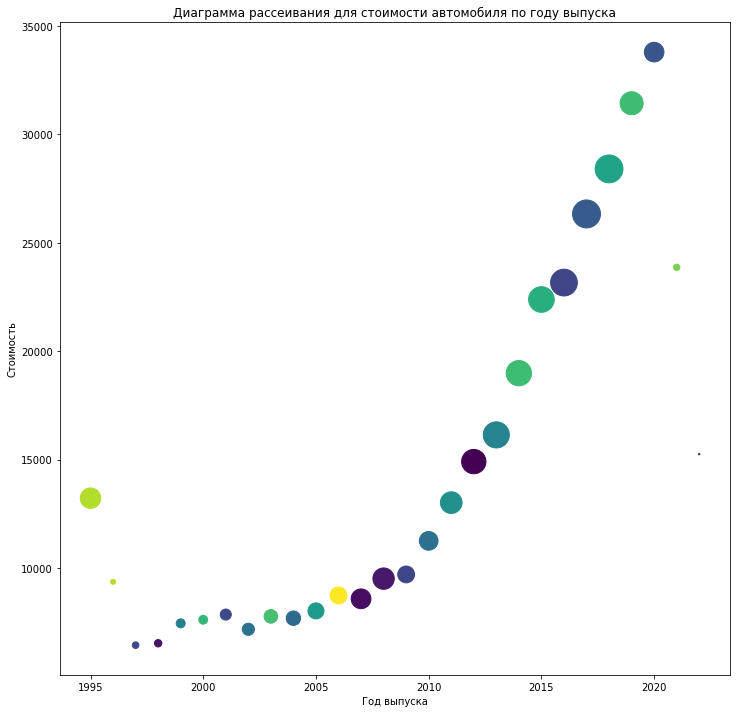

In [13]:
# Сторим ящик с усами
plt.figure(figsize=(12, 12))
colors = np.random.rand(df_year_price.shape[0])
area = df_year_price.avt_count
plt.scatter(x=df_year_price.index, y=df_year_price['price_mean'], s=area, c=colors)
plt.ylabel('Стоимость')
plt.xlabel('Год выпуска')
plt.title('Диаграмма рассеивания для стоимости автомобиля по году выпуска')
plt.show()

3. Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили. Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведете количество автомобилей, произведенных в каждый год, воспользуейтесь группировкой по годам.

In [14]:
# Количество автомобилей, произведенных в каждый год
print(df_year_price.avt_count)

year
1995    419
1996     25
1997     44
1998     55
1999     81
2000     78
2001    122
2002    149
2003    185
2004    208
2005    257
2006    287
2007    390
2008    457
2009    283
2010    350
2011    469
2012    592
2013    682
2014    640
2015    657
2016    718
2017    782
2018    774
2019    531
2020    384
2021     40
2022      2
Name: avt_count, dtype: int64


4. За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставьте в датафрейме автомобили, произведенные не позднее 2021 года, выведете первые пять значений датафрейма.

In [15]:
# Ваш код здесь
df_new_2020 = df_new[df_new['year']<2021]
df_new_2020

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
8125,7312874623,https://desmoines.craigslist.org/cto/d/des-moi...,des moines,https://desmoines.craigslist.org,500,2006,jeep,grand cherokee,gas,150000,clean,manual,https://images.craigslist.org/00z0z_cT6FWo2FUe...,RUNS DRIVES SHIFTS BRAKES AN STEERS EXCELLENT ...,ia,41.638100,-93.620300,2021-04-26T11:54:48-0500,low,2021-04-26 16:54:48+00:00
3142,7309151068,https://philadelphia.craigslist.org/ctd/d/east...,philadelphia,https://philadelphia.craigslist.org,500,2017,subaru,impreza,gas,66447,clean,automatic,https://images.craigslist.org/00G0G_gfRSdwiemR...,$500 DUE AT SIGNING. NO CREDIT CHECK!!! BAD C...,pa,40.699264,-75.226232,2021-04-19T08:14:57-0400,low,2021-04-19 12:14:57+00:00
8339,7310789965,https://providence.craigslist.org/ctd/d/provid...,rhode island,https://providence.craigslist.org,500,2013,ford,focus,gas,97000,clean,automatic,https://images.craigslist.org/00g0g_5hQGDAJNf0...,MINIMUM OF $500.00 DOWN PAYMENT!!!!! NO BANK ...,ri,41.793575,-71.450623,2021-04-22T09:32:47-0400,low,2021-04-22 13:32:47+00:00
6360,7302068140,https://cleveland.craigslist.org/ctd/d/clevela...,cleveland,https://cleveland.craigslist.org,500,2014,chevrolet,malibu,gas,10000,clean,automatic,https://images.craigslist.org/00808_69FzBuYFb6...,📣 SPECIAL EVENT 📣 We will be having our first...,oh,41.463159,-81.646343,2021-04-05T11:19:54-0400,low,2021-04-05 15:19:54+00:00
4269,7306155920,https://palmsprings.craigslist.org/ctd/d/jurup...,palm springs,https://palmsprings.craigslist.org,500,2013,nissan,altima,gas,130000,salvage,automatic,https://images.craigslist.org/00z0z_cOLzInlBVQ...,Call* 909 333 8413 Or 323 713 7682 Follow us o...,ca,34.003300,-117.445000,2021-04-13T08:14:22-0700,low,2021-04-13 15:14:22+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783,7310636675,https://kpr.craigslist.org/ctd/d/pasco-lifted-...,kennewick-pasco-richland,https://kpr.craigslist.org,56999,2015,ford,f350 diesels powerstroke,diesel,51004,clean,automatic,https://images.craigslist.org/00k0k_3hM8zwsmae...,2015 Ford F350 Lariat 4x4 **Clean Carfax Lifte...,wa,46.234838,-119.128015,2021-04-21T17:05:57-0700,high,2021-04-22 00:05:57+00:00
6317,7302792147,https://columbiamo.craigslist.org/ctd/d/clinto...,columbia / jeff city,https://columbiamo.craigslist.org,57112,2020,chevrolet,silverado 3500hd,gas,98880,clean,automatic,https://images.craigslist.org/00X0X_9mDk9LfFMs...,➔ Want to see more pictures? Paste this link ...,mo,38.382623,-93.773440,2021-04-06T15:15:34-0500,high,2021-04-06 20:15:34+00:00
3217,7315245624,https://columbiamo.craigslist.org/ctd/d/clinto...,columbia / jeff city,https://columbiamo.craigslist.org,57341,2019,chevrolet,silverado 1500,gas,39356,clean,automatic,https://images.craigslist.org/01010_krCQnwDyN4...,➔ Want to see more pictures?Paste this link to...,mo,38.382623,-93.773440,2021-05-01T08:10:47-0500,high,2021-05-01 13:10:47+00:00
8470,7308181844,https://maine.craigslist.org/ctd/d/plaistow-20...,maine,https://maine.craigslist.org,57990,2015,chevrolet,silverado,diesel,60614,clean,automatic,https://images.craigslist.org/01414_34oDctfUlM...,2015 Chevrolet Chevy Silverado 3500HD LTZ 4x4 ...,me,42.834977,-71.107791,2021-04-17T09:06:29-0400,high,2021-04-17 13:06:29+00:00


5. На отфильтрованных данных повторите действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год. Не забудьте переименовать колонки согласно их содержанию.

In [16]:
# Ваш код здесь
df_year_price_= df_new_2020.groupby(['year']).agg({'price': 'mean', 'id': 'count'})
df_year_price_ = df_year_price_.rename(columns={'year': 'year_', 'price': 'price_mean', 'id': 'avt_count'})
df_year_price_

,price_mean,avt_count
year,,
1995,13219.472554,419
1996,9362.960000,25
1997,6441.250000,44
1998,6528.672727,55
1999,7446.641975,81
2000,7614.410256,78
2001,7852.090164,122
2002,7173.798658,149
2003,7767.962162,185


6. Постройте линейный график ([plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) для визуализации зависимости стоимости от года выпуска автомобиля, настройте цвет линии —  `blue`, символ маркировки точек (`marker`) — ромб/алмаз — `D`, цвет точек (`markerfacecolor`) — `orange`. Используйте среднюю стоимость автомобиля, рассчитаную в предыдущем задании.
Не забудьте подписать название графика и оси.

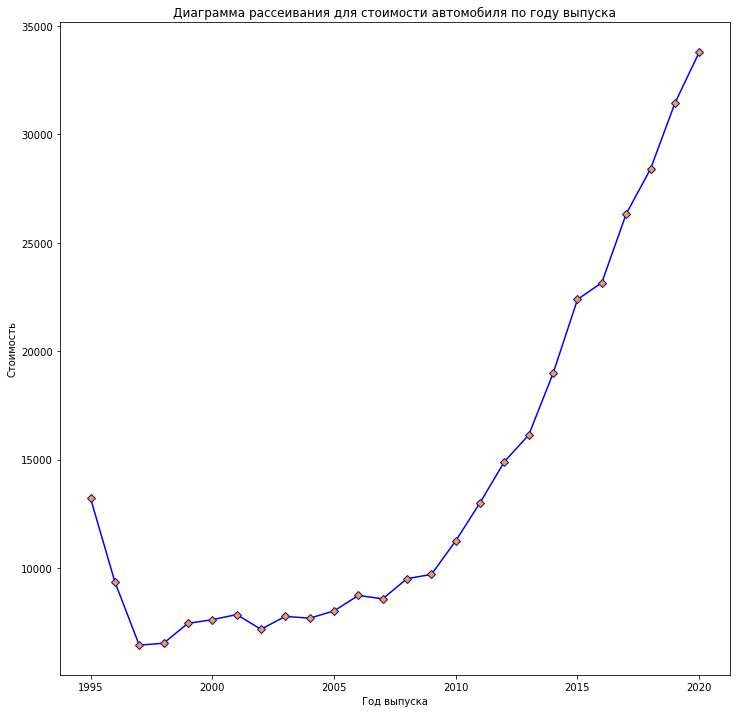

In [19]:
# Ваш код здесь
plt.figure(figsize=(12, 12))
plt.plot(df_year_price_['price_mean'], c='blue',marker='D',markerfacecolor = 'orange')
plt.ylabel('Стоимость')
plt.xlabel('Год выпуска')
plt.title('Диаграмма рассеивания для стоимости автомобиля по году выпуска')
plt.show()

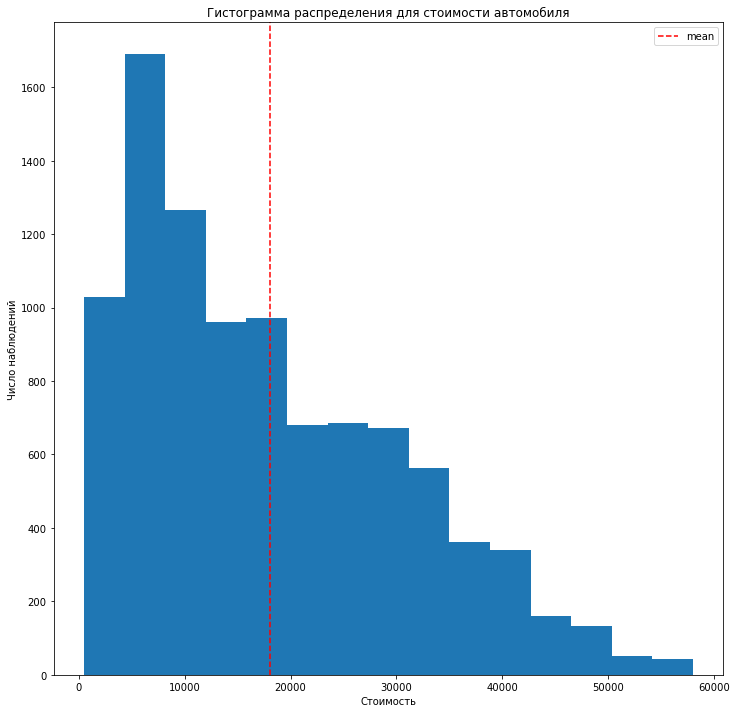

In [30]:
plt.figure(figsize=(12, 12))
plt.hist(df_new_2020.price, bins = 15)
plt.axvline(df_new_2020.price.mean(), color = 'red', linestyle = 'dashed')
plt.xlabel('Стоимость')
plt.ylabel('Число наблюдений')
plt.title('Гистограмма распределения для стоимости автомобиля')
plt.legend(['mean'])
plt.show()

7. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля и года его производства. Ответьте на вопросы:


    1. Можно ли сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: Связь между стоимостью автомобиля и годом выпуска есть и она линейна. Коэффициент корреляции >0, возможен только при линейной зависимости.

    2. Можно ли сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства? Почему?
    Ваш ответ: коэффициент кореляции средний, кофициент ниже 0,8, но выше 0,5

    3. Существующая связь является прямой или обратной? Почему?
    Ваш ответ: Связь прямая коэффициент корреляции Пирсона для стоимости автомобиля и года его производства положительный

In [31]:
# Считаем коэффициент корреляции Пирсона для стоимости автомобиля и года его производства
#Считаем средствами Pandas
rho_ = df_new_2020.price.corr(df_new_2020.year)
print('Pandas. Pearson rho: ', rho_)
#Считаем с использованием библиотеки stats
res = stats.pearsonr(df_new_2020.price, df_new_2020.year)
print('Stats. Pearson rho: ', res[0], ',', 'p-value: ', res[1])

Pandas. Pearson rho:  0.5517189388950722
Stats. Pearson rho:  0.5517189388950714 , p-value:  0.0


In [32]:
# calculate spearman's correlation
coef, p = stats.spearmanr(df_new_2020.year, df_new_2020.price)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.664
Samples are correlated (reject H0) p=0.000


In [33]:
df_new_2020.corr()

,id,price,year,odometer,lat,long
id,1.000000,-0.094815,-0.100476,0.048108,-0.077992,-0.109705
price,-0.094815,1.000000,0.551719,-0.532678,-0.013819,-0.046448
year,-0.100476,0.551719,1.000000,-0.502363,-0.030911,0.018927
odometer,0.048108,-0.532678,-0.502363,1.000000,0.026160,-0.004025
lat,-0.077992,-0.013819,-0.030911,0.026160,1.000000,-0.134596
long,-0.109705,-0.046448,0.018927,-0.004025,-0.134596,1.000000


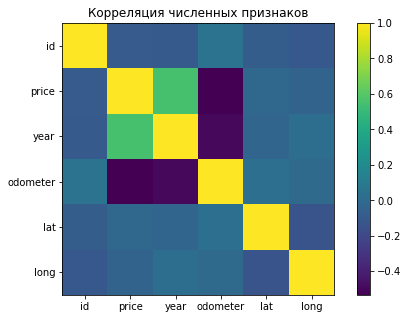

In [34]:
plt.figure(figsize=(8, 5))

columns = df_new_2020.corr().columns.tolist()
plt.imshow(df_new_2020.corr())

plt.title("Корреляция численных признаков")
plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

8. Для обновленных данных постройте гистограмму распределения стоимости автомобиля, настройте размер фигуры — 8x5, параметры количества интервалов — 20, цвет — indigo. Не забудьте подписать название графика и оси.

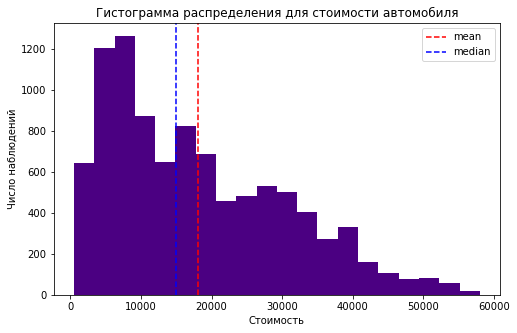

In [35]:
# гистограммa распределения стоимости автомобиля
plt.figure(figsize=(8, 5))
plt.hist(df_new_2020.price, bins = 20, color='indigo')
plt.axvline(df_new_2020.price.mean(), color = 'red', linestyle = 'dashed')
plt.axvline(df_new_2020.price.median(), color = 'blue', linestyle = 'dashed')
plt.xlabel('Стоимость')
plt.ylabel('Число наблюдений')
plt.title('Гистограмма распределения для стоимости автомобиля')
plt.legend(['mean', 'median'])
plt.show()

9. Сохраните для дальнейшего использования датафрейм `df_new` в файл `data/vehicles_dataset_upd2.csv`, индексы не сохраняйте.

In [36]:
# Сохраняем для дальнейшего использования датафрейм `df_new_2020` в файл
df_new_2020.to_csv('data/vehicles_dataset_upd2.csv', index=False, encoding='utf-8')

### Задача 3. Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

1. На одном полотне постройте графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, параметры прозрачности — 0.7, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории. 

Подумайте, почему полученный график так выглядит?


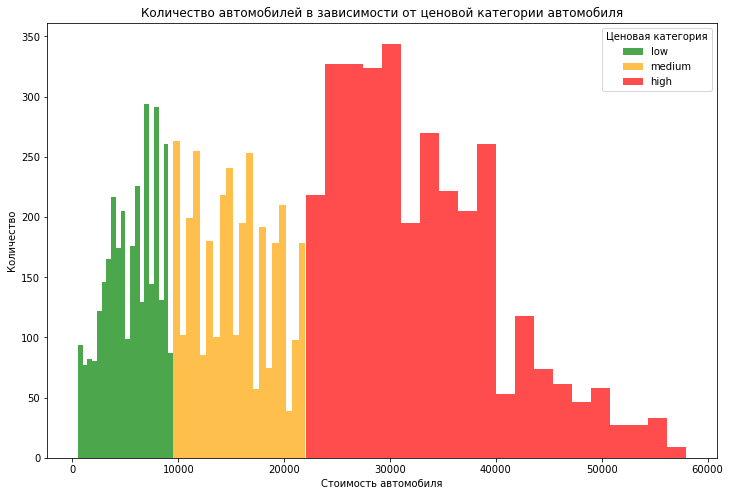

In [37]:
# Строим графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new_2020[df_new_2020['price_category'] == price_category]
    ax.hist(data['price'], bins=20, color=color, alpha=0.7)

plt.ylabel('Количество')
plt.xlabel('Стоимость автомобиля')
plt.title('Количество автомобилей в зависимости от ценовой категории автомобиля')
plt.legend(colors, title="Ценовая категория");

2. На одном полотне постройте диаграмму рассеяния для стоимости автомобиля и его года выпуска. Раскрасьте каждую точку (автомобиль) согласно ценовой категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от ценовой категории — зеленый, оранжевый и красный для низкой, средней и высокой ценовой категории соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для ценовой категории, расположив ее в нижнем правом углу. 

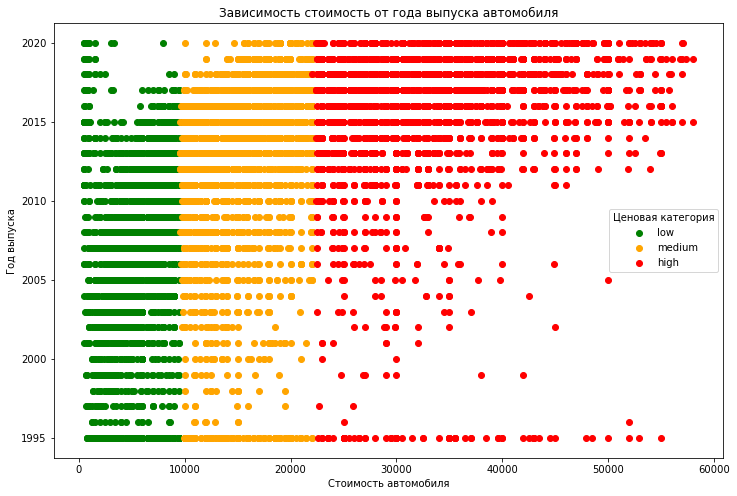

In [41]:
# 2. Строим диаграмму рассеяния для стоимости автомобиля и его года выпуска
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new_2020[df_new_2020['price_category'] == price_category]

    ax.scatter(data['price'], data['year'], c=color, label=price_category)

ax.legend(loc=5, title="Ценовая категория")
plt.title("Зависимость стоимость от года выпуска автомобиля")
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Год выпуска')
plt.show()

### Задача 4. Визуализация категориальных переменных

1. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.


In [44]:
# Сформируйте новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей
stats_manuf = df_new_2020.groupby(['manufacturer']).agg({'id':'count'})
stats_manuf = stats_manuf.rename(columns={'manufacturer': 'manufacturer', 'id': 'count_avto'})
stats_manuf

,count_avto
manufacturer,
acura,149
alfa-romeo,13
audi,193
bmw,307
buick,144
cadillac,176
chevrolet,1239
chrysler,159
datsun,2


2. Постройте столбчатую диаграмму для производителей автомобиля, настройте размер фигуры — 20x10, ширину интервалов (`width`) — 0.9, цвета — чередующиеся `springgreen` и `dodgerblue`. Не забудьте подписать название графика и оси.
Для оси OX разверните подписи на 45 градусов, используя метод `xticks` и его параметр `rotation`.

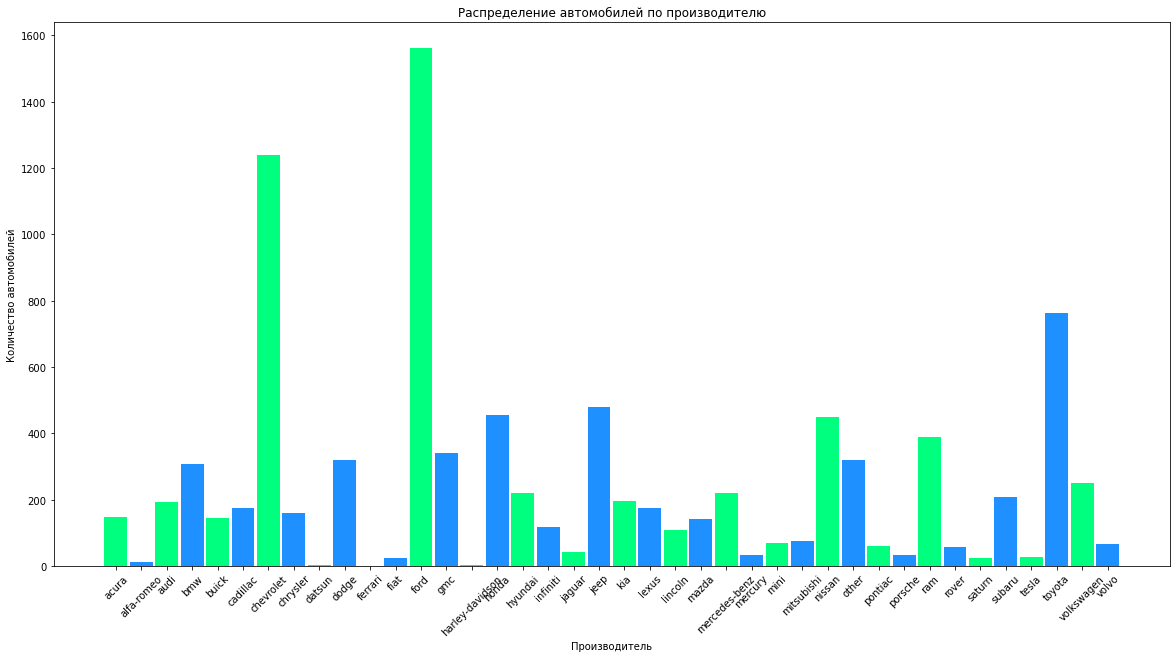

In [46]:
# Строим столбчатую диаграмму для производителей автомобиля
fig,ax = plt.subplots(figsize=(20, 10))
ax.bar(stats_manuf.index.values, stats_manuf['count_avto'], color=['springgreen','dodgerblue'], width = 0.9)

ax.set_xlabel('Производитель')
ax.set_ylabel('Количество автомобилей')
ax.set_title('Распределение автомобилей по производителю')
ax.set_xticks(stats_manuf.index.values, stats_manuf.index.values, minor = False, rotation=45);

3. Сформируйте и отобразите новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач (воспользуейтесь группировкой). Не забудьте переименовать колонки согласно их содержанию.

In [49]:
# Сформируем новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач
stats_transm = df_new_2020.groupby(['transmission']).agg({'id':'count'})
stats_transm = stats_transm.rename(columns={'transmission': 'transmission', 'id': 'count_avto'})
stats_transm

,count_avto
transmission,
automatic,7363
manual,612
other,1644


4. Постройте круговую диаграмму для коробки передач автомобиля, настройте размер фигуры — 12x8, формат подписи о соотношении категорий, расстояние от метки о соотношении категорий до края сегмента. Не забудьте подписать название графика и оси, а также вывести легенду отдельно.


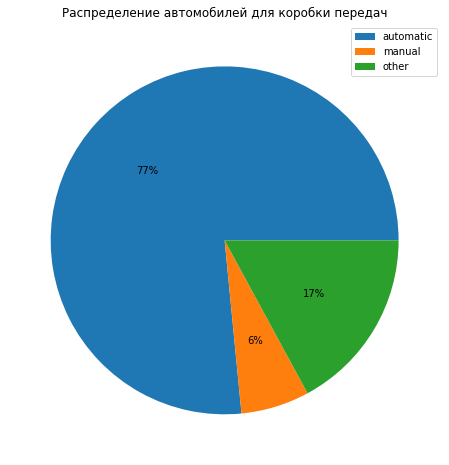

In [50]:
# Строим круговую диаграмму для коробки передач автомобиля
plt.figure(figsize=(12, 8))
plt.pie(stats_transm.count_avto, labels=stats_transm.index.values, labeldistance=None, autopct = '%1.0f%%')
plt.title("Распределение автомобилей для коробки передач")
plt.legend()
plt.show();